# Working with COVID-19 data

The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) is collecting data on COVID-19 cases. They use this data to run their well known [COVID-19 Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6). 

They are publically sharing the data they are compiling. This data is [posted to GitHub](https://github.com/CSSEGISandData/COVID-19) so that anyone can download it and work with it.

I downloaded this data using `git`, a popular program used by computer programmers for synchronizing data. If you know some `git` you can do the same as me. Use a terminal to go to a directory where you'd like to store the data, and run the command:
```
git clone https://github.com/CSSEGISandData/COVID-19
```
This will create a new directory titled `COVID-19` that contains all the files. If you want to update your directory, you can enter that directory and execute the command:
```
git pull
```

You can accomplish the same thing while avoiding using `git`. Go to the [CSSEGISandData/COVID-19 GitHub website](https://github.com/CSSEGISandData/COVID-19). You'll see a green `Clone or download` button. Click it and then select "Download ZIP". You will then be prompted to download a ZIP file of all the data. You can unzip that file to get the `COVID-19` data directory. Later when you want to update the data, you can download the zip file again and replace your directory.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

# For working with files:
import os
# For working with CSV files:
import csv

## Setup

We first define a string `jhu_data_directory` that points to the data we downloaded. In my case to get to the data from the directory containing the notebook, I have to go up one level and then into the `COVID-19` directory.

In [2]:
jhu_data_directory = "../COVID-19"

Below we run some basic tests on the data. You'll get errors if the data is not present at this location.

In [3]:
# Tests for the data directory
assert os.path.isdir(jhu_data_directory), \
    "jhu_data_directory is not a directory"
assert os.path.isdir(jhu_data_directory+"/csse_covid_19_data"), \
    'jhu_data_directory+"/csse_covid_19_data" is not a directory'
time_series_directory = jhu_data_directory+"/csse_covid_19_data/csse_covid_19_time_series"
assert os.path.isdir(time_series_directory), \
    'jhu_data_directory+"/csse_covid_19_data/csse_covid_19_time_series" is not a directory'

We will search the following files for data:

In [4]:
confirmed_data_file = time_series_directory + "/time_series_19-covid-Confirmed.csv"
deaths_data_file = time_series_directory + "/time_series_19-covid-Deaths.csv"
recovered_data_file = time_series_directory + "/time_series_19-covid-Recovered.csv"

data_files = [confirmed_data_file, deaths_data_file, recovered_data_file]
for file in data_files:
    print(file)
    assert os.path.isfile(file), file + " is not a file."

../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv


## Reading data from the files

The data files listed above are comma-separated values (CSV) files. You can open them with a text editor to see the data. Alternately, you can open then with a spreadsheet program.

Python has a module for working with CSV files. Here is a link to the documentation:
* [CSV File Reading and Writing](https://docs.python.org/3/library/csv.html)

We can load the library with:

In [5]:
import csv

We can open a file for reading with the following command:

In [6]:
# Open a file for reading:
csvfile = open(confirmed_data_file)
# Create a CSV reader to process the open file
reader = csv.reader(csvfile)

Calling `next(reader)` returns a single list containing the first row of the data. In this case, the first row is header data describing the corresponding rows. See below.

In [7]:
row = next(reader)
for entry in row:
    print(entry, end="; ")

Province/State; Country/Region; Lat; Long; 1/22/20; 1/23/20; 1/24/20; 1/25/20; 1/26/20; 1/27/20; 1/28/20; 1/29/20; 1/30/20; 1/31/20; 2/1/20; 2/2/20; 2/3/20; 2/4/20; 2/5/20; 2/6/20; 2/7/20; 2/8/20; 2/9/20; 2/10/20; 2/11/20; 2/12/20; 2/13/20; 2/14/20; 2/15/20; 2/16/20; 2/17/20; 2/18/20; 2/19/20; 2/20/20; 2/21/20; 2/22/20; 2/23/20; 2/24/20; 2/25/20; 2/26/20; 2/27/20; 2/28/20; 2/29/20; 3/1/20; 3/2/20; 3/3/20; 3/4/20; 3/5/20; 3/6/20; 3/7/20; 3/8/20; 3/9/20; 3/10/20; 3/11/20; 3/12/20; 3/13/20; 3/14/20; 3/15/20; 3/16/20; 3/17/20; 

You can see from the above that future rows will consist of `row[0]` a State (or a Province), `row[1]` a Country or a Region, `row[2]` a lattitude, `row[3]` a longitude, and data corresponding to each day starting on January 22, 2020 and ending at some point. Since this is the `confirmed_data_file`, this lists the total number of confirmed cases by day. We'll store the list of days in a variable:

In [8]:
day_list = row[4:]
for day in day_list:
    print(day, end="; ")

1/22/20; 1/23/20; 1/24/20; 1/25/20; 1/26/20; 1/27/20; 1/28/20; 1/29/20; 1/30/20; 1/31/20; 2/1/20; 2/2/20; 2/3/20; 2/4/20; 2/5/20; 2/6/20; 2/7/20; 2/8/20; 2/9/20; 2/10/20; 2/11/20; 2/12/20; 2/13/20; 2/14/20; 2/15/20; 2/16/20; 2/17/20; 2/18/20; 2/19/20; 2/20/20; 2/21/20; 2/22/20; 2/23/20; 2/24/20; 2/25/20; 2/26/20; 2/27/20; 2/28/20; 2/29/20; 3/1/20; 3/2/20; 3/3/20; 3/4/20; 3/5/20; 3/6/20; 3/7/20; 3/8/20; 3/9/20; 3/10/20; 3/11/20; 3/12/20; 3/13/20; 3/14/20; 3/15/20; 3/16/20; 3/17/20; 

Now lets look at the next row:

In [9]:
row = next(reader)
for entry in row:
    print(entry, end="; ")

; Thailand; 15; 101; 2; 3; 5; 7; 8; 8; 14; 14; 14; 19; 19; 19; 19; 25; 25; 25; 25; 32; 32; 32; 33; 33; 33; 33; 33; 34; 35; 35; 35; 35; 35; 35; 35; 35; 37; 40; 40; 41; 42; 42; 43; 43; 43; 47; 48; 50; 50; 50; 53; 59; 70; 75; 82; 114; 147; 177; 

In [10]:
int(row[-1]) - int(row[-2])

30

We see that the second row in the file corresponds to Thailand. The entries `15` and `101` are lattitude and longitude for Thailand and the other entries are the number of confirmed cases for each day as above. So the number of confirmed cases on the first day is given by:

In [11]:
row[4]

'2'

Observe that this is a string. So, we'd be better of converting it to an integer with `int(row[4])`. To get all the confirmed days from the row as int, we can do the following:

In [12]:
thailand_confirmed_cases = []
for count in row[4:]:
    thailand_confirmed_cases.append(int(count))

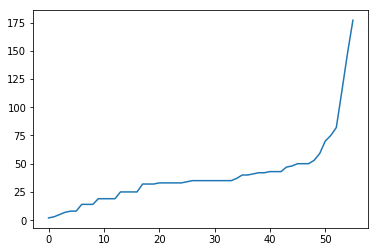

In [13]:
plt.plot(thailand_confirmed_cases)
plt.show()

We can continue reading rows in this way. When there is no further row, `next(reader)` will raise a `StopIteration` exception. Let us close the file:

In [14]:
csvfile.close()

## Organizing the list of countries and states

I want to give a printout of each country and the corresponding states. Here I form a list of pairs `(state, country)`:

In [15]:
state_country_pairs = []
# Open a file for reading:
csvfile = open(confirmed_data_file)
# Create a CSV reader to process the open file
reader = csv.reader(csvfile)
# Skip the header line:
next(reader)
try:
    while True:
        row = next(reader)
        state_country_pairs.append((row[0], row[1]))
except StopIteration:
    pass
csvfile.close()

Below, I form a dictionary `country_dict` mapping countries to a list of states. (We haven't discussed dictionaries yet, but you can learn about them in the [Python 3 Tutorial](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).) I also form a sorted list of `countries`.

In [16]:
country_dict = {}
for state, country in state_country_pairs:
    if country in country_dict:
        country_dict[country].append(state)
    else:
        country_dict[country] = [state]
countries = []
for country in country_dict:
    countries.append(country)
    country_dict[country].sort()
countries.sort()
for country in countries:
    print(country, end=": ")
    for state in country_dict[country]:
        print(state, end="; ")
    print()

Afghanistan: ; 
Albania: ; 
Algeria: ; 
Andorra: ; 
Antigua and Barbuda: ; 
Argentina: ; 
Armenia: ; 
Aruba: ; 
Australia: Australian Capital Territory; From Diamond Princess; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Victoria; Western Australia; 
Austria: ; 
Azerbaijan: ; 
Bahrain: ; 
Bangladesh: ; 
Barbados: ; 
Belarus: ; 
Belgium: ; 
Benin: ; 
Bhutan: ; 
Bolivia: ; 
Bosnia and Herzegovina: ; 
Brazil: ; 
Brunei: ; 
Bulgaria: ; 
Burkina Faso: ; 
Cambodia: ; 
Cameroon: ; 
Canada: Alberta; British Columbia; Grand Princess; Manitoba; New Brunswick; Newfoundland and Labrador; Nova Scotia; Ontario; Prince Edward Island; Quebec; Saskatchewan; 
Central African Republic: ; 
Chile: ; 
China: Anhui; Beijing; Chongqing; Fujian; Gansu; Guangdong; Guangxi; Guizhou; Hainan; Hebei; Heilongjiang; Henan; Hong Kong; Hubei; Hunan; Inner Mongolia; Jiangsu; Jiangxi; Jilin; Liaoning; Macau; Ningxia; Qinghai; Shaanxi; Shandong; Shanghai; Shanxi; Sichuan; Tianjin; Tibet; Xin

## The number of cases:

It seems that every row has a country (or regions), while some don't have states (or provinces).

In [17]:
def confirmed_cases(state, country):
    # Open a file for reading:
    csvfile = open(confirmed_data_file)
    # Create a CSV reader to process the open file
    reader = csv.reader(csvfile)
    try:
        while True:
            row = next(reader)
            if row[1]==country and row[0]==state:
                # Just return data for each day.
                cases = []
                for num in row[4:]:
                    cases.append(int(num))
                csvfile.close()
                return np.array(cases)
    except StopIteration:
        csvfile.close()
        raise ValueError("Didn't find row with state='{}' and country='{}'" \
                        .format(state, country))

[   1    1    2    2    3    4    4    4    4   11   12   15   15   16
   19   23   24   24   25   27   28   28   28   28   28   29   30   31
   31  104  204  433  602  833  977 1261 1766 2337 3150 3736 4335 5186
 5621 6088 6593 7041 7314 7478 7513 7755 7869 7979 8086 8162 8236 8320]


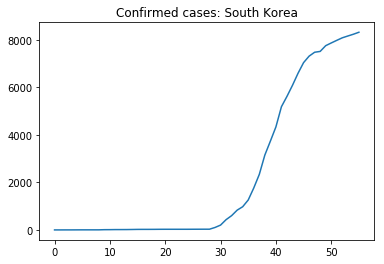

In [18]:
confirmed = confirmed_cases("", "Korea, South")
print(confirmed)
plt.plot(confirmed)
plt.title("Confirmed cases: South Korea")
plt.show()

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  173  220  328  421  525  732  967 1706]


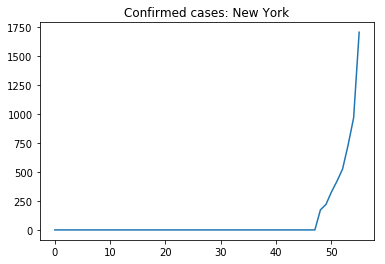

In [19]:
confirmed = confirmed_cases("New York", "US")
print(confirmed)
plt.plot(confirmed)
plt.title("Confirmed cases: New York")
plt.show()

[    0     0     0     0     0     0     0     0     0     2     2     2
     2     2     2     2     3     3     3     3     3     3     3     3
     3     3     3     3     3     3    20    62   155   229   322   453
   655   888  1128  1694  2036  2502  3089  3858  4636  5883  7375  9172
 10149 12462 12462 17660 21157 24747 27980 31506]


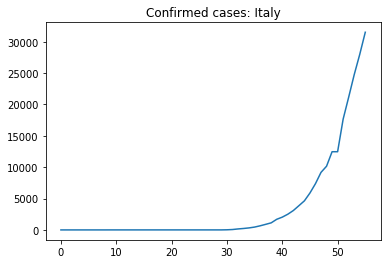

In [20]:
confirmed = confirmed_cases("", "Italy")
print(confirmed)
plt.plot(confirmed)
plt.title("Confirmed cases: Italy")
plt.show()

## Deaths and Recovered:

We can create similar functions for handling deaths and recovered. This data is stored in the files whose locations we stored off in `deaths_data_file` and `recovered_data_file`.

In [21]:
def deaths_cases(state, country):
    # Open a file for reading:
    csvfile = open(deaths_data_file)
    # Create a CSV reader to process the open file
    reader = csv.reader(csvfile)
    try:
        while True:
            row = next(reader)
            if row[1]==country and row[0]==state:
                # Just return data for each day.
                cases = []
                for num in row[4:]:
                    cases.append(int(num))
                csvfile.close()
                return np.array(cases)
    except StopIteration:
        csvfile.close()
        raise ValueError("Didn't find row with state='{}' and country='{}'" \
                        .format(state, country))
        return None

def recovered_cases(state, country):
    # Open a file for reading:
    csvfile = open(recovered_data_file)
    # Create a CSV reader to process the open file
    reader = csv.reader(csvfile)
    try:
        while True:
            row = next(reader)
            if row[1]==country and row[0]==state:
                # Just return data for each day.
                cases = []
                for num in row[4:]:
                    cases.append(int(num))
                csvfile.close()
                return np.array(cases)
    except StopIteration:
        csvfile.close()
        raise ValueError("Didn't find row with state='{}' and country='{}'" \
                        .format(state, country))
        return None

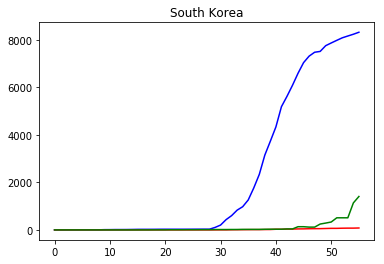

In [22]:
state = ""
country = "Korea, South"
confirmed = confirmed_cases(state, country)
deaths = deaths_cases(state, country)
recovered = recovered_cases(state, country)
plt.plot(confirmed,"b")
plt.plot(deaths,"r")
plt.plot(recovered,"g")
plt.title("South Korea")
plt.show()

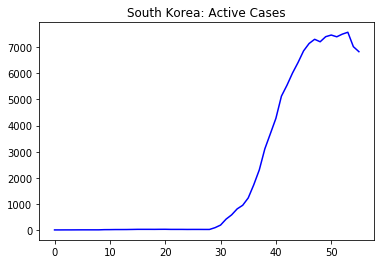

In [23]:
active = confirmed - deaths - recovered
plt.plot(active,"b")
plt.title("South Korea: Active Cases")
plt.show()

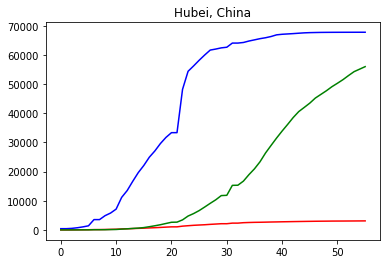

In [24]:
state = "Hubei"
country = "China"
confirmed = confirmed_cases(state, country)
deaths = deaths_cases(state, country)
recovered = recovered_cases(state, country)
plt.plot(confirmed,"b")
plt.plot(deaths,"r")
plt.plot(recovered,"g")
plt.title("Hubei, China")
plt.show()

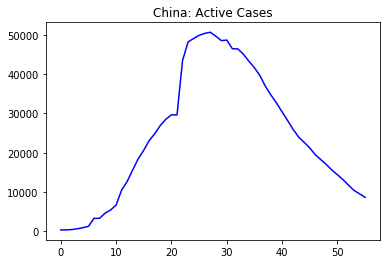

In [25]:
active = confirmed - deaths - recovered
plt.plot(active,"b")
plt.title("China: Active Cases")
plt.show()

## New York and Maryland: New cases by day

We'd like to compare the number of new COVID-19 cases by day in New York and Maryland.

In [26]:
# Get the number of confirmed cases in NY and MD.
state = "New York"
country = "US"
confirmed_NY = confirmed_cases(state, country)
state = "Maryland"
confirmed_MD = confirmed_cases(state, country)
confirmed_MD

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9, 12,
       18, 26, 32, 41, 60])

In [27]:
# We set start to the index of the last zero entry.
# (The number of confirmed cases is increases over time.)
for i in range(len(confirmed_NY)):
    if confirmed_NY[i] > 0:
        break
start = i - 1
start 

47

In [28]:
# Here we get the days indexed begining with `start`.
day_list[start:]

['3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20']

In [29]:
# Here we throw out the initial zeros in the NY data.
confirmed_NY = confirmed_NY[start:]
# We throw out the same days for MD.
confirmed_MD = confirmed_MD[start:]

In [30]:
# Here is the number of new cases each day in NY
delta_NY = confirmed_NY[1:] - confirmed_NY[:-1]
# Here is the number of new cases each day in MD
delta_MD = confirmed_MD[1:] - confirmed_MD[:-1]
delta_MD

array([ 8,  1,  3,  6,  8,  6,  9, 19])

Now we can plot the data.

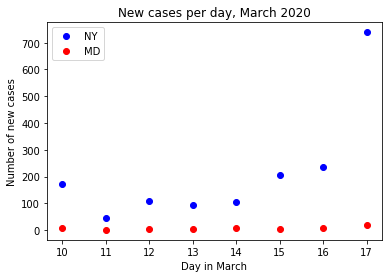

In [31]:
plot_NY, = plt.plot(range(10,18), delta_NY,"ob", label="NY")
plot_MD, = plt.plot(range(10,18), delta_MD,"or", label = "MD")
plt.title("New cases per day, March 2020")
# Create a legend for the first line.
legend = plt.legend(handles=[plot_NY,plot_MD], loc='upper left')
plt.xlabel("Day in March")
plt.ylabel("Number of new cases")
plt.show()